# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
import scipy
from iminuit import Minuit
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression

## Data reader

In [47]:
raw_data_list = []

for fname in glob.glob('../data/Project/timer_output_*'):
    observer = fname.split(sep='_')[2].split(sep='.')[0]
    df = pd.read_csv(fname, delimiter='\t', index_col=0, names=['', observer])
    raw_data_list.append(df)

df = pd.concat(raw_data_list, axis=1)

df

,brage,marcus,riz,rune-bad,rune
,,,,,
1,5.1374,42.5693,46.0723,16.8322,10.7774
2,13.5814,51.0955,54.5188,25.3711,19.4984
3,22.0674,59.7183,63.1905,33.9520,27.8649
4,30.9218,68.2820,71.7849,42.5871,36.5309
5,39.5508,76.9425,80.3651,51.1670,45.3027
6,48.3397,85.5723,88.8923,59.9312,53.8639
7,56.8111,94.0442,97.6394,68.5034,62.4347
8,65.4522,102.6905,106.0964,77.0499,71.0893
9,73.8730,111.2846,114.8345,85.6578,79.8538


In [48]:
for col in df:
    column = df[col].dropna()
    coefs = np.polyfit(column.index, column.values, 1)
    df[col + '-fit'] = coefs[1] + df[col].index * coefs[0]
    df[col + '-res'] = df[col] - df[col + '-fit']

df

,brage,marcus,riz,rune-bad,rune,brage-fit,brage-res,marcus-fit,marcus-res,riz-fit,riz-res,rune-bad-fit,rune-bad-res,rune-fit,rune-res
,,,,,,,,,,,,,,,
1,5.1374,42.5693,46.0723,16.8322,10.7774,5.027304,0.110096,42.442502,0.126798,45.904572,0.167728,16.744818,0.087382,10.761949,0.015451
2,13.5814,51.0955,54.5188,25.3711,19.4984,13.664340,-0.082940,51.049888,0.045612,54.522764,-0.003964,25.363880,0.007220,19.382793,0.115607
3,22.0674,59.7183,63.1905,33.9520,27.8649,22.301376,-0.233976,59.657275,0.061025,63.140955,0.049545,33.982942,-0.030942,28.003637,-0.138737
4,30.9218,68.2820,71.7849,42.5871,36.5309,30.938412,-0.016612,68.264662,0.017338,71.759147,0.025753,42.602004,-0.014904,36.624481,-0.093581
5,39.5508,76.9425,80.3651,51.1670,45.3027,39.575448,-0.024648,76.872049,0.070451,80.377339,-0.012239,51.221066,-0.054066,45.245325,0.057375
6,48.3397,85.5723,88.8923,59.9312,53.8639,48.212484,0.127216,85.479435,0.092865,88.995531,-0.103231,59.840128,0.091072,53.866169,-0.002269
7,56.8111,94.0442,97.6394,68.5034,62.4347,56.849520,-0.038420,94.086822,-0.042622,97.613722,0.025678,68.459190,0.044210,62.487013,-0.052313
8,65.4522,102.6905,106.0964,77.0499,71.0893,65.486556,-0.034356,102.694209,-0.003709,106.231914,-0.135514,77.078252,-0.028352,71.107857,-0.018557
9,73.8730,111.2846,114.8345,85.6578,79.8538,74.123592,-0.250592,111.301596,-0.016996,114.850106,-0.015606,85.697314,-0.039514,79.728701,0.125099


In [50]:
df[['brage-res', 'marcus-res', 'rune-bad-res', 'rune-res', 'riz-res']].std()

brage-res       0.116762
marcus-res      0.100382
rune-bad-res    0.047178
rune-res        0.069610
riz-res         0.106778
dtype: float64

## Read and plot the data

Text(0, 0.5, 'Time (s)')

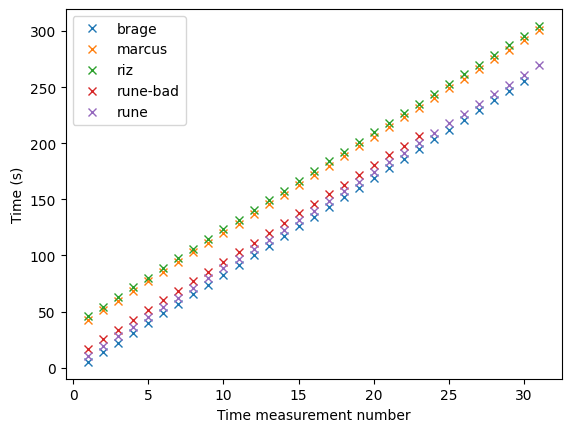

In [5]:
for col in df:
    plt.plot(df[col], label=col, linestyle='', marker='x')
plt.legend()
plt.xlabel('Time measurement number')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time period (s)')

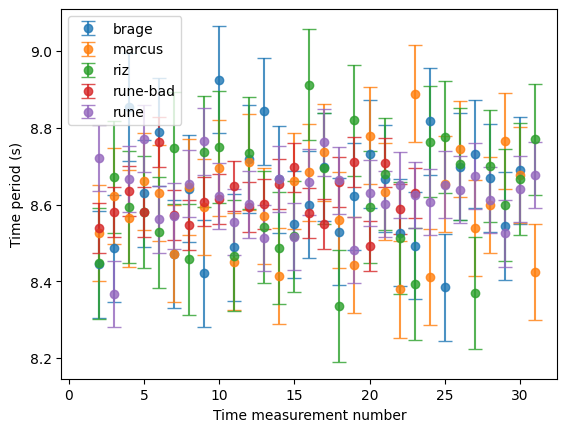

In [6]:
for col in df:
    plt.errorbar(df.index, df[col].diff(), label=col, yerr=df[col].diff().std(), fmt='o', alpha=0.8, capsize=5)
plt.legend()
plt.xlabel('Time measurement number')
plt.ylabel('Time period (s)')

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

Independent data: Note that the errors in the previous plots are *correlated*: The error in a reading is linked to it's neighbours. To avoid this, we only consider alternate time differences below.

In [7]:
time_df = df.diff().iloc[1::2]  # 

time_df

,brage,marcus,riz,rune-bad,rune
,,,,,
2,8.4440,8.5262,8.4465,8.5389,8.7210
4,8.8544,8.5637,8.5944,8.6351,8.6660
6,8.7889,8.6298,8.5272,8.7642,8.5612
8,8.6411,8.6463,8.4570,8.5465,8.6546
10,8.9256,8.6952,8.7498,8.6154,8.6228
12,8.7190,8.7102,8.7342,8.5948,8.6003
14,8.6656,8.4143,8.4863,8.6547,8.6662
16,8.5995,8.6839,8.9128,8.5773,8.6588
18,8.5291,8.5591,8.3355,8.6578,8.6629


In [8]:
col_data, col_errors = [], []

for col in time_df:
    column = time_df[col].dropna()
    mean, sd = column.mean(), column.std()
    print(f"{col:8}: {mean = :.5f}, {sd = :.5f}")
    residuals = column - mean
    # sns.displot(residuals, kind='hist')

    # probability using the ChiSquare function (e.g. from scipy):
    Chi2_calc = 0.0
    for datapoint in column: 
        Chi2_calc += ((datapoint - mean) / sd)**2
    
    Nvar = 1                     # Number of variables
    Ndof_calc = len(column) - Nvar   # Number of degrees of freedom = Number of data points - Number of variables
    
    Prob_calc =  scipy.stats.chi2.sf(Chi2_calc, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof)

    col_data.append(column)
    col_errors.append(sd * np.ones_like(column))

    print(f"{col:8}: {Chi2_calc = :.5f}, {Prob_calc = :.5f}")


brage   : mean = 8.68665, sd = 0.12973
brage   : Chi2_calc = 14.00000, Prob_calc = 0.44971
marcus  : mean = 8.60130, sd = 0.12484
marcus  : Chi2_calc = 14.00000, Prob_calc = 0.44971
riz     : mean = 8.61238, sd = 0.15322
riz     : Chi2_calc = 14.00000, Prob_calc = 0.44971
rune-bad: mean = 8.60605, sd = 0.07284
rune-bad: Chi2_calc = 10.00000, Prob_calc = 0.44049
rune    : mean = 8.63954, sd = 0.03704
rune    : Chi2_calc = 14.00000, Prob_calc = 0.44971


In [9]:
grouped_data = pd.DataFrame({"Time": pd.concat(col_data), "Error": np.concatenate(col_errors)})
grouped_data

,Time,Error
,,
2,8.4440,0.129731
4,8.8544,0.129731
6,8.7889,0.129731
8,8.6411,0.129731
10,8.9256,0.129731
...,...,...
22,8.6507,0.037045
24,8.6069,0.037045
26,8.6391,0.037045


In [17]:
chi2_object = Chi2Regression(lambda x, t: t, grouped_data.index, grouped_data['Time'], grouped_data['Error'])
chi2_object.errordef = 1.0    # Chi2 definition (for Minuit)

minuit = Minuit(chi2_object, t=8.65)     # Own alternative

# Perform the actual fit:
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 71.75                      │              Nfcn = 13               │
│ EDM = 4.55e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t    │   8.634   │   0.008   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        t │
├───┼──────────┤
│ t │ 6.45e-05 │
└───┴──────────┘

In [18]:
t_fit = minuit.values['t']
sigma_t_fit = minuit.errors['t']

t_fit, sigma_t_fit

(8.634274377977649, 0.008033034831577076)

In [19]:
Nvar = 1                     # Number of variables (alpha0 and alpha1)
Ndof_fit = len(grouped_data) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = scipy.stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

Chi2_fit, Prob_fit

(71.75231803577351, 0.41951067878727033)